正在绘制 Tokyo ...
Tokyo 路网图已保存为：output_maps/Tokyo_road_network.png


/home/huang/anaconda3/envs/gt/lib/python3.12/site-packages/graph_tool/draw/cairo_draw.py:668: UserWarning: Unknown parameter: align
  warnings.warn("Unknown parameter: " + k, UserWarning)


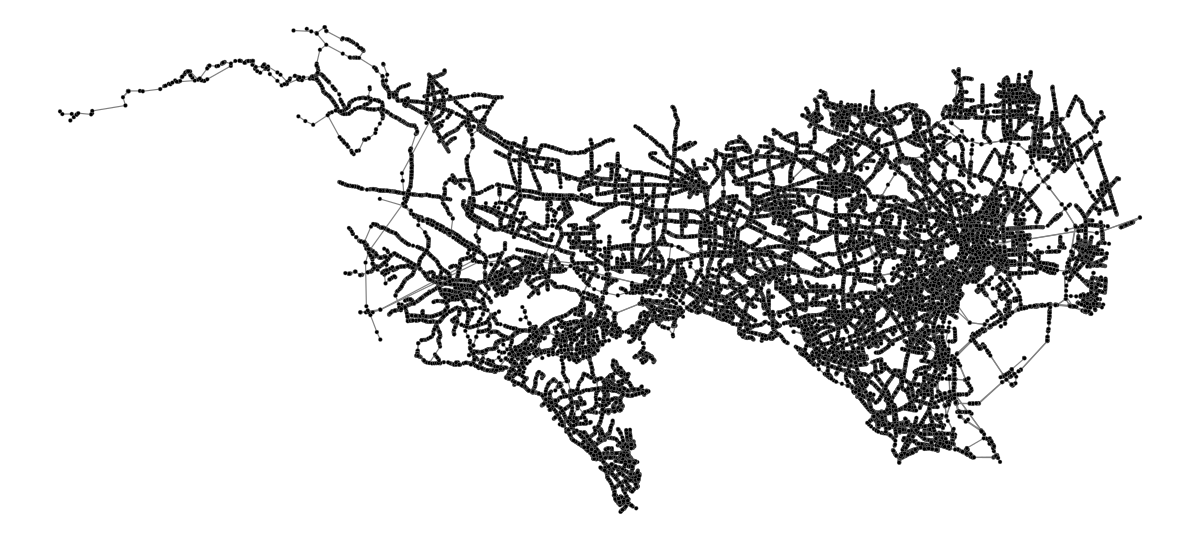

正在绘制 Tokyo_23 ...
Tokyo_23 路网图已保存为：output_maps/Tokyo_23_road_network.png


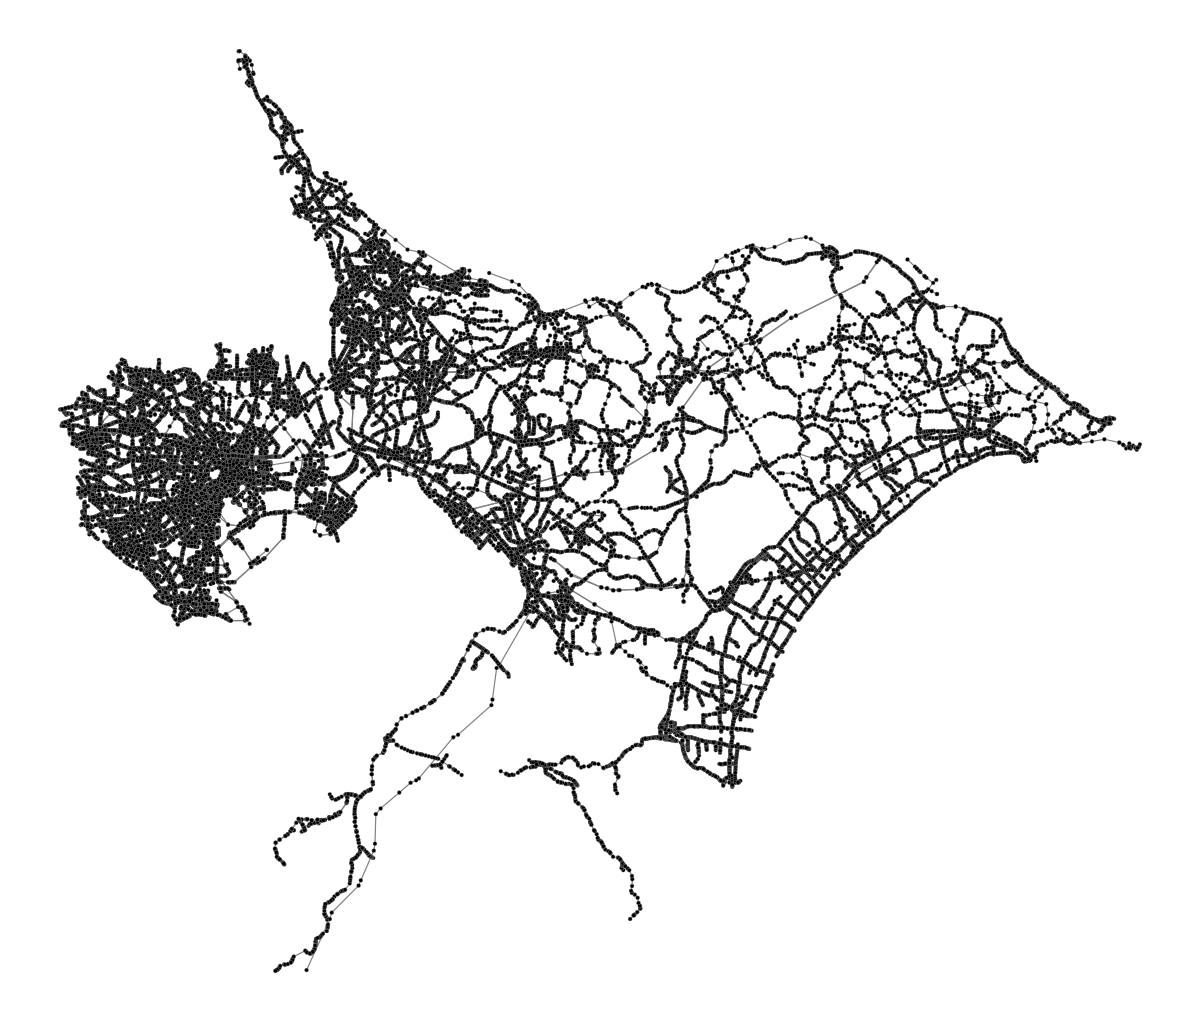

正在绘制 Osaka ...
Osaka 路网图已保存为：output_maps/Osaka_road_network.png


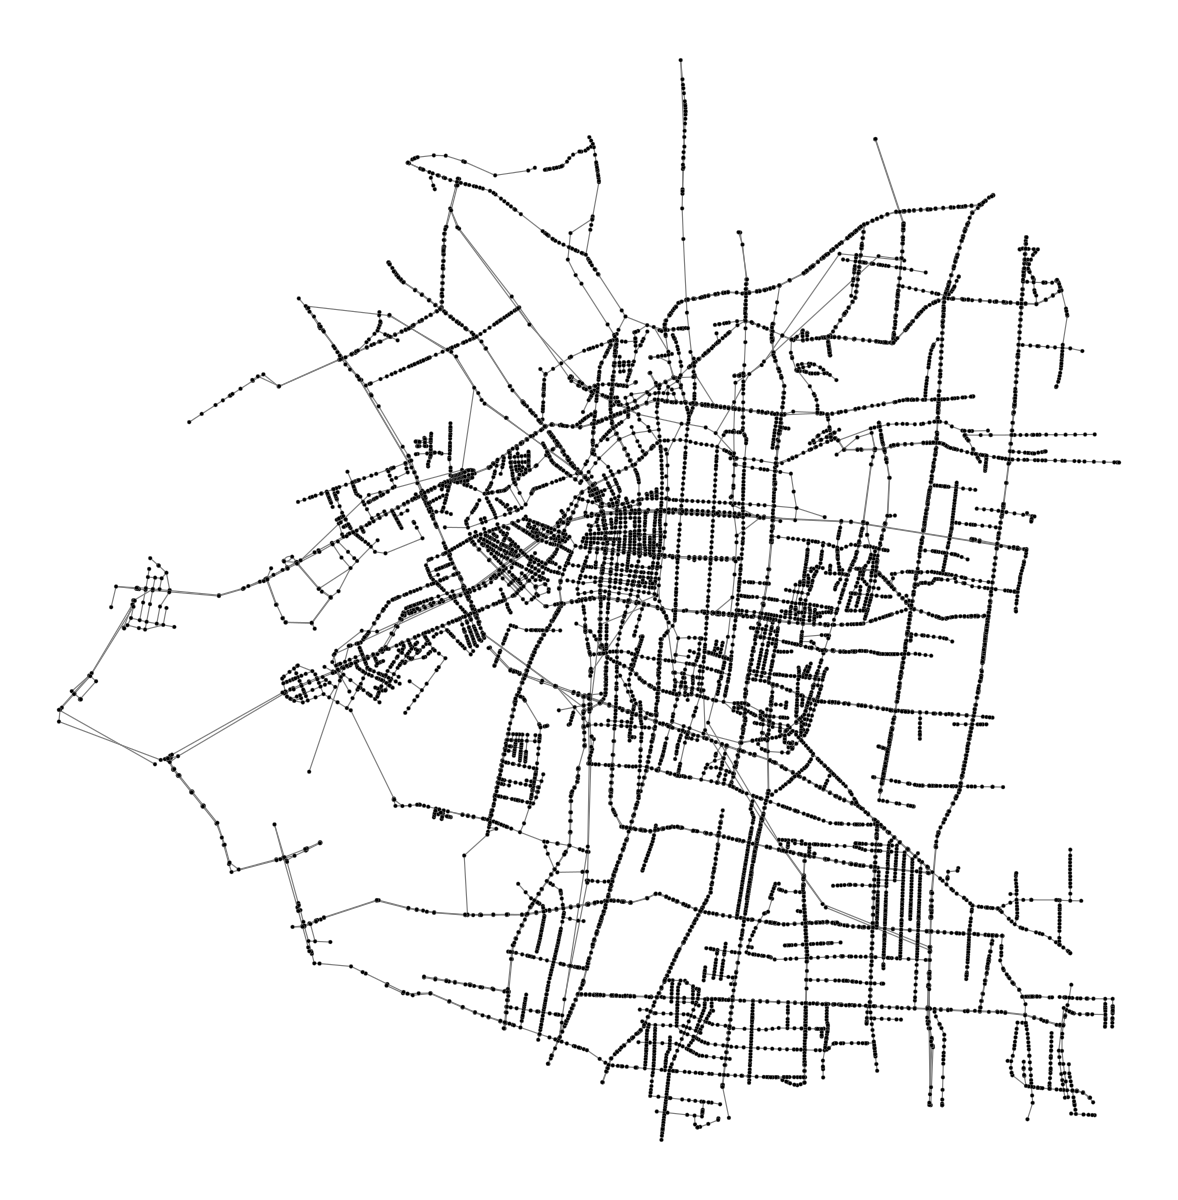

In [5]:
import graph_tool.all as gt
from pyproj import Transformer
import os

# 1. .graphml 文件所在的文件夹
graphml_folder = "road_networks_graphml"

# 2. 城市文件名映射（确认这些文件名和文件夹中的一致）
city_files = {
    "Tokyo": "Tokyo_road_network.graphml",
    "Tokyo_23": "Tokyo_23_wards_road_network.graphml",
    "Osaka": "Osaka_road_network.graphml"
}

# 3. 输出图片保存路径
output_dir = "output_maps"
os.makedirs(output_dir, exist_ok=True)

# 4. 坐标转换器：WGS84 → 日本EPSG:6677
transformer = Transformer.from_crs("epsg:4326", "epsg:6677", always_xy=True)

# 5. 遍历每个城市文件进行加载 + 绘图
for city, filename in city_files.items():
    print(f"正在绘制 {city} ...")

    # 拼接完整路径
    file_path = os.path.join(graphml_folder, filename)

    # 加载图
    G = gt.load_graph(file_path)

    # 创建坐标属性并进行经纬度 → 平面坐标转换
    pos = G.new_vertex_property("vector<double>")
    for v in G.vertices():
        lon = float(G.vertex_properties["x"][v])
        lat = float(G.vertex_properties["y"][v])
        x, y = transformer.transform(lon, lat)
        pos[v] = [x, -y]  # 反转 y 轴，更贴合地理方向

    # 画图并保存
    output_path = os.path.join(output_dir, f"{city}_road_network.png")
    gt.graph_draw(
        G,
        pos=pos,
        output_size=(1000, 1000),
        vertex_size=2,
        edge_pen_width=0.6,
        vertex_fill_color="black",
        edge_color="gray",
        bg_color="white",
        output=output_path  # 保存 PNG
    )
    print(f"{city} 路网图已保存为：{output_path}")

    # 同时在 notebook 中显示图像
    gt.graph_draw(
        G,
        pos=pos,
        output_size=(600, 600),
        vertex_size=2,
        edge_pen_width=0.6,
        vertex_fill_color="black",
        edge_color="gray",
        bg_color="white",
        align=True  # 居中显示
    )


In [9]:
import graph_tool.all as gt
from pyproj import Transformer
import os
import matplotlib.pyplot as plt

# ==== 1. 设置文件路径 ====
graphml_folder = "road_networks_graphml"
filename = "Tokyo_road_network.graphml"
file_path = os.path.join(graphml_folder, filename)

# ==== 2. 加载图 ====
G = gt.load_graph(file_path)

# ==== 3. 经纬度 → 平面坐标转换（EPSG:4326 → EPSG:6677）====
transformer = Transformer.from_crs("epsg:4326", "epsg:6677", always_xy=True)
pos = G.new_vertex_property("vector<double>")
for v in G.vertices():
    lon = float(G.vp["x"][v])
    lat = float(G.vp["y"][v])
    x, y = transformer.transform(lon, lat)
    pos[v] = [x, -y]  # 反转 y 轴以符合地图习惯

# ==== 4. 构建道路等级颜色映射 ====
highway_color_map = {
    "motorway": "red",
    "motorway_link": "orange",
    "trunk": "darkorange",
    "primary": "gold",
    "secondary": "green",
    "tertiary": "lightgreen",
    "residential": "gray",
    "service": "blue",
    "unclassified": "black"
}

e_color = G.new_edge_property("string")
for e in G.edges():
    hw_tag = G.ep["highway"][e]
    if isinstance(hw_tag, list):
        hw_type = hw_tag[0]
    else:
        hw_type = hw_tag
    e_color[e] = highway_color_map.get(hw_type, "lightgray")  # 未知类型用灰色

# ==== 5. 使用 matplotlib 绘图，避免 invalid matrix 报错 ====
fig, ax = plt.subplots(figsize=(10, 10))

gt.graph_draw(
    G,
    pos=pos,
    output_size=(1000, 1000),
    vertex_size=0,
    edge_color=e_color,
    edge_pen_width=0.8,
    bg_color=[1, 1, 1, 1],
    fit_view=False,
    mplfig=ax
)

plt.axis('off')
plt.title("Tokyo Road Network by Highway Type", fontsize=14)
plt.tight_layout()
plt.show()

# ==== 6. 可选：保存图像 ====
output_path = "output_maps/Tokyo_colored_road_mpl.png"
os.makedirs("output_maps", exist_ok=True)
plt.savefig(output_path, dpi=300, bbox_inches="tight")
print(f"图像已保存为：{output_path}")


<Figure size 1000x1000 with 1 Axes>

图像已保存为：output_maps/Tokyo_colored_road_mpl.png


<Figure size 640x480 with 0 Axes>